# Undirected scale-free networks

## Dependencies

In [1]:
%load_ext autoreload
%autoreload 2

from netin.models import HomophilyModel, PAModel, PAHModel, PATCHModel, CompoundLFM
from netin import viz
from netin.stats import get_node_metadata_as_dataframe

## Network parameters

In [2]:
N = 1000
m = 2
f_m = 0.1
h_MM = 0.9
h_mm = 0.9
tc = 0.8
seed = 1234

## Generation

In [3]:
# PA: Preferential attachment
m_pa = PAModel(N=N, m=m, f_m=f_m, seed=seed)
m_pa.simulate()

In [4]:
# H: Homophily
m_h = HomophilyModel(N=N, m=m, f_m=f_m, h_m=h_mm, h_M=h_MM, seed=seed)
m_h.simulate()

In [5]:
# PAH: Preferential attachment and homophily
m_pah = PAHModel(N=N, m=m, f_m=f_m, h_m=h_mm, h_M=h_MM, seed=seed)
m_pah.simulate()

In [6]:
# PATCH: Preferential attachment, homophily, and triadic closure
lfm_l = CompoundLFM.PAH
lfm_g = CompoundLFM.PAH
tau = .0

m_patch = PATCHModel(N=N, m=m, f_m=f_m,
                     tau=tau,
                     lfm_tc=lfm_l, lfm_global=lfm_g,
                     h_m=h_mm, h_M=h_MM,
                     seed=seed)

m_patch.simulate()

## Plots

In [7]:
viz.reset_style()
viz.set_paper_style()

### Graph

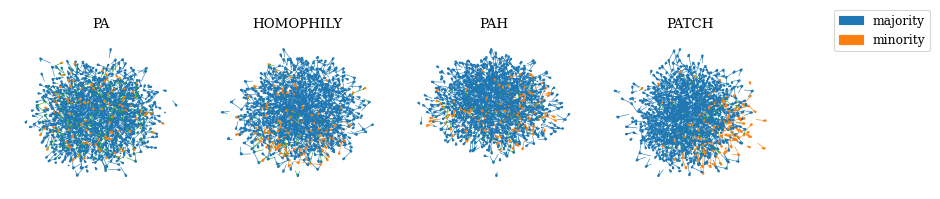

In [8]:
models = [m_pa, m_h, m_pah, m_patch]
viz.plot_graph(
    models,
    cell_size=2, edge_width=0.4,
    share_pos=False,
    ignore_singletons=False)

### Node attributes

In [9]:
distributions = []
for m in models:
    md = get_node_metadata_as_dataframe(graph=m.graph, n_jobs=10)
    md.name = m.SHORT
    distributions.append(md)
    del(md)

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

In [10]:
# see example of genereate metadata
distributions[0].head()

,node,class_label,real_label,degree,in_degree,out_degree,clustering,betweenness,closeness,eigenvector,pagerank,degree_rank,in_degree_rank,out_degree_rank,clustering_rank,betweenness_rank,closeness_rank,eigenvector_rank,pagerank_rank
0,0,0,M,44,NaN,NaN,0.006342,0.110839,0.348448,0.271319,0.009466,0.06250,NaN,NaN,0.794118,0.003058,0.004149,0.002,0.002014
1,1,0,M,57,NaN,NaN,0.011278,0.164670,0.368499,0.434886,0.012208,0.03125,NaN,NaN,0.529412,0.001019,0.001383,0.001,0.001007
2,2,0,M,18,NaN,NaN,0.019608,0.036766,0.324456,0.142024,0.003898,0.50000,NaN,NaN,0.382353,0.015291,0.012448,0.009,0.024169
3,3,0,M,41,NaN,NaN,0.009756,0.119312,0.353378,0.268370,0.008719,0.09375,NaN,NaN,0.617647,0.002039,0.002766,0.003,0.003021
4,4,0,M,6,NaN,NaN,0.000000,0.007945,0.296088,0.066250,0.001337,0.87500,NaN,NaN,1.000000,0.075433,0.027663,0.024,0.148036


#### Degree

xmin progress: 00%
xmin progress: 03%
xmin progress: 06%
xmin progress: 10%
xmin progress: 13%
xmin progress: 16%
xmin progress: 20%
xmin progress: 23%
xmin progress: 26%
xmin progress: 30%
xmin progress: 33%
xmin progress: 36%
xmin progress: 40%
xmin progress: 43%
xmin progress: 46%
xmin progress: 50%
xmin progress: 53%
xmin progress: 56%
xmin progress: 60%
xmin progress: 63%
xmin progress: 66%
xmin progress: 70%
xmin progress: 73%
xmin progress: 76%
xmin progress: 80%
xmin progress: 83%
xmin progress: 86%
xmin progress: 90%
xmin progress: 93%
xmin progress: 96%
xmin progress: 00%
xmin progress: 09%
xmin progress: 18%
xmin progress: 27%
xmin progress: 36%
xmin progress: 45%
xmin progress: 54%
xmin progress: 63%
xmin progress: 72%
xmin progress: 81%
xmin progress: 90%
xmin progress: 00%
xmin progress: 06%
xmin progress: 13%
xmin progress: 20%
xmin progress: 26%
xmin progress: 33%
xmin progress: 40%
xmin progress: 46%
xmin progress: 53%
xmin progress: 60%
xmin progress: 66%
xmin progres

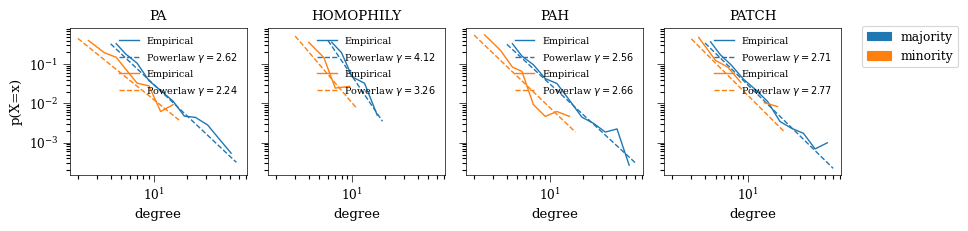

In [11]:
viz.plot_powerlaw_fit(distributions, col_name='degree', hue='real_label',
                      kind='pdf', fontsize=7,
                      cell_size=(2.15,2.4), sharex=True, sharey=True)

xmin progress: 00%
xmin progress: 03%
xmin progress: 06%
xmin progress: 10%
xmin progress: 13%
xmin progress: 16%
xmin progress: 20%
xmin progress: 23%
xmin progress: 26%
xmin progress: 30%
xmin progress: 33%
xmin progress: 36%
xmin progress: 40%
xmin progress: 43%
xmin progress: 46%
xmin progress: 50%
xmin progress: 53%
xmin progress: 56%
xmin progress: 60%
xmin progress: 63%
xmin progress: 66%
xmin progress: 70%
xmin progress: 73%
xmin progress: 76%
xmin progress: 80%
xmin progress: 83%
xmin progress: 86%
xmin progress: 90%
xmin progress: 93%
xmin progress: 96%
xmin progress: 00%
xmin progress: 09%
xmin progress: 18%
xmin progress: 27%
xmin progress: 36%
xmin progress: 45%
xmin progress: 54%
xmin progress: 63%
xmin progress: 72%
xmin progress: 81%
xmin progress: 90%
xmin progress: 00%
xmin progress: 06%
xmin progress: 13%
xmin progress: 20%
xmin progress: 26%
xmin progress: 33%
xmin progress: 40%
xmin progress: 46%
xmin progress: 53%
xmin progress: 60%
xmin progress: 66%
xmin progres

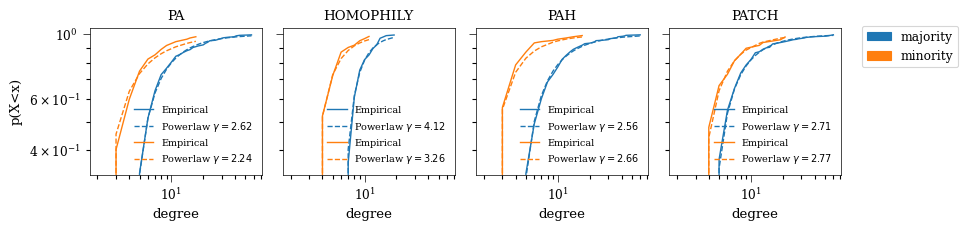

In [12]:
viz.plot_powerlaw_fit(distributions, col_name='degree', hue='real_label',
                      kind='cdf', fontsize=7,
                      cell_size=(2.15,2.4), sharex=True, sharey=True)

xmin progress: 00%
xmin progress: 03%
xmin progress: 06%
xmin progress: 10%
xmin progress: 13%
xmin progress: 16%
xmin progress: 20%
xmin progress: 23%
xmin progress: 26%
xmin progress: 30%
xmin progress: 33%
xmin progress: 36%
xmin progress: 40%
xmin progress: 43%
xmin progress: 46%
xmin progress: 50%
xmin progress: 53%
xmin progress: 56%
xmin progress: 60%
xmin progress: 63%
xmin progress: 66%
xmin progress: 70%
xmin progress: 73%
xmin progress: 76%
xmin progress: 80%
xmin progress: 83%
xmin progress: 86%
xmin progress: 90%
xmin progress: 93%
xmin progress: 96%
xmin progress: 00%
xmin progress: 09%
xmin progress: 18%
xmin progress: 27%
xmin progress: 36%
xmin progress: 45%
xmin progress: 54%
xmin progress: 63%
xmin progress: 72%
xmin progress: 81%
xmin progress: 90%
xmin progress: 00%
xmin progress: 06%
xmin progress: 13%
xmin progress: 20%
xmin progress: 26%
xmin progress: 33%
xmin progress: 40%
xmin progress: 46%
xmin progress: 53%
xmin progress: 60%
xmin progress: 66%
xmin progres

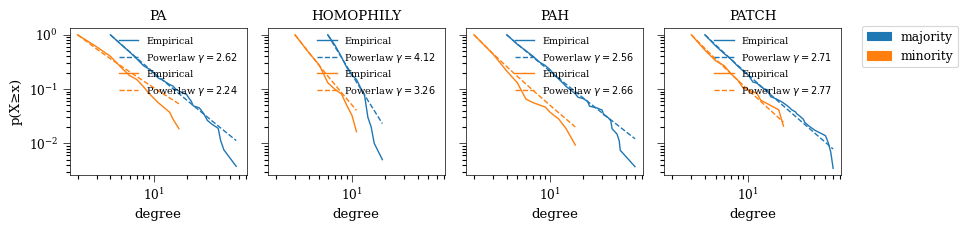

In [13]:
viz.plot_powerlaw_fit(distributions, col_name='degree', hue='real_label',
                      kind='ccdf', fontsize=7,
                      cell_size=(2.15,2.4), sharex=True, sharey=True)

#### Clustering

xmin progress: 00%
xmin progress: 03%
xmin progress: 06%
xmin progress: 10%
xmin progress: 13%
xmin progress: 17%
xmin progress: 20%
xmin progress: 24%
xmin progress: 27%
xmin progress: 31%
xmin progress: 34%
xmin progress: 37%
xmin progress: 41%
xmin progress: 44%
xmin progress: 48%
xmin progress: 51%
xmin progress: 55%
xmin progress: 58%
xmin progress: 62%
xmin progress: 65%
xmin progress: 68%
xmin progress: 72%
xmin progress: 75%
xmin progress: 79%
xmin progress: 82%
xmin progress: 86%
xmin progress: 89%
xmin progress: 93%
xmin progress: 96%
xmin progress: 00%
xmin progress: 14%
xmin progress: 28%
xmin progress: 42%
xmin progress: 57%
xmin progress: 71%
xmin progress: 85%
xmin progress: 00%
xmin progress: 04%
xmin progress: 09%
xmin progress: 13%
xmin progress: 18%
xmin progress: 22%
xmin progress: 27%
xmin progress: 31%
xmin progress: 36%
xmin progress: 40%
xmin progress: 45%
xmin progress: 50%
xmin progress: 54%
xmin progress: 59%
xmin progress: 63%
xmin progress: 68%
xmin progres

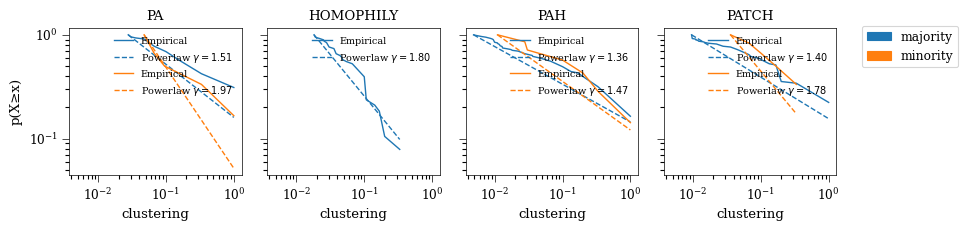

In [14]:
viz.plot_powerlaw_fit(distributions, col_name='clustering', hue='real_label',
                      kind='ccdf', fontsize=7,
                      cell_size=(2.15,2.4), sharex=True, sharey=True)

#### PageRank

xmin progress: 00%
xmin progress: 00%
xmin progress: 00%
xmin progress: 00%
xmin progress: 00%
xmin progress: 00%
xmin progress: 00%
xmin progress: 00%
xmin progress: 00%
xmin progress: 01%
xmin progress: 01%
xmin progress: 01%
xmin progress: 01%
xmin progress: 01%
xmin progress: 01%
xmin progress: 01%
xmin progress: 01%
xmin progress: 01%
xmin progress: 02%
xmin progress: 02%
xmin progress: 02%
xmin progress: 02%
xmin progress: 02%
xmin progress: 02%
xmin progress: 02%
xmin progress: 02%
xmin progress: 02%
xmin progress: 03%
xmin progress: 03%
xmin progress: 03%
xmin progress: 03%
xmin progress: 03%
xmin progress: 03%
xmin progress: 03%
xmin progress: 03%
xmin progress: 03%
xmin progress: 04%
xmin progress: 04%
xmin progress: 04%
xmin progress: 04%
xmin progress: 04%
xmin progress: 04%
xmin progress: 04%
xmin progress: 04%
xmin progress: 04%
xmin progress: 05%
xmin progress: 05%
xmin progress: 05%
xmin progress: 05%
xmin progress: 05%
xmin progress: 05%
xmin progress: 05%
xmin progres

xmin progress: 00%
xmin progress: 00%
xmin progress: 01%
xmin progress: 02%
xmin progress: 03%
xmin progress: 04%
xmin progress: 05%
xmin progress: 06%
xmin progress: 07%
xmin progress: 08%
xmin progress: 09%
xmin progress: 10%
xmin progress: 11%
xmin progress: 12%
xmin progress: 13%
xmin progress: 14%
xmin progress: 15%
xmin progress: 16%
xmin progress: 16%
xmin progress: 17%
xmin progress: 18%
xmin progress: 19%
xmin progress: 20%
xmin progress: 21%
xmin progress: 22%
xmin progress: 23%
xmin progress: 24%
xmin progress: 25%
xmin progress: 26%
xmin progress: 27%
xmin progress: 28%
xmin progress: 29%
xmin progress: 30%
xmin progress: 31%
xmin progress: 32%
xmin progress: 33%
xmin progress: 33%
xmin progress: 34%
xmin progress: 35%
xmin progress: 36%
xmin progress: 37%
xmin progress: 38%
xmin progress: 39%
xmin progress: 40%
xmin progress: 41%
xmin progress: 42%
xmin progress: 43%
xmin progress: 44%
xmin progress: 45%
xmin progress: 46%
xmin progress: 47%
xmin progress: 48%
xmin progres

xmin progress: 77%
xmin progress: 77%
xmin progress: 77%
xmin progress: 77%
xmin progress: 77%
xmin progress: 77%
xmin progress: 77%
xmin progress: 78%
xmin progress: 78%
xmin progress: 78%
xmin progress: 78%
xmin progress: 78%
xmin progress: 78%
xmin progress: 78%
xmin progress: 78%
xmin progress: 78%
xmin progress: 79%
xmin progress: 79%
xmin progress: 79%
xmin progress: 79%
xmin progress: 79%
xmin progress: 79%
xmin progress: 79%
xmin progress: 79%
xmin progress: 79%
xmin progress: 80%
xmin progress: 80%
xmin progress: 80%
xmin progress: 80%
xmin progress: 80%
xmin progress: 80%
xmin progress: 80%
xmin progress: 80%
xmin progress: 80%
xmin progress: 81%
xmin progress: 81%
xmin progress: 81%
xmin progress: 81%
xmin progress: 81%
xmin progress: 81%
xmin progress: 81%
xmin progress: 81%
xmin progress: 82%
xmin progress: 82%
xmin progress: 82%
xmin progress: 82%
xmin progress: 82%
xmin progress: 82%
xmin progress: 82%
xmin progress: 82%
xmin progress: 82%
xmin progress: 83%
xmin progres

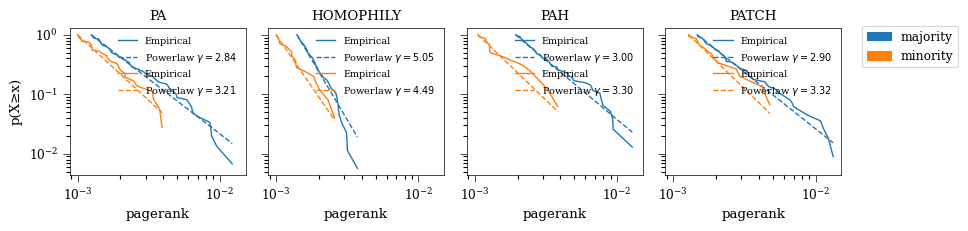

In [15]:
viz.plot_powerlaw_fit(distributions, col_name='pagerank', hue='real_label',
                      kind='ccdf', verbose=False, bbox=(1, 0.9), fontsize=7,
                      cell_size=(2.15,2.4), sharex=True, sharey=True)